# Como reter profissionais gestores em dados no Brasil? 
## Uma análise a partir dos dados de satisfação do emprego atual

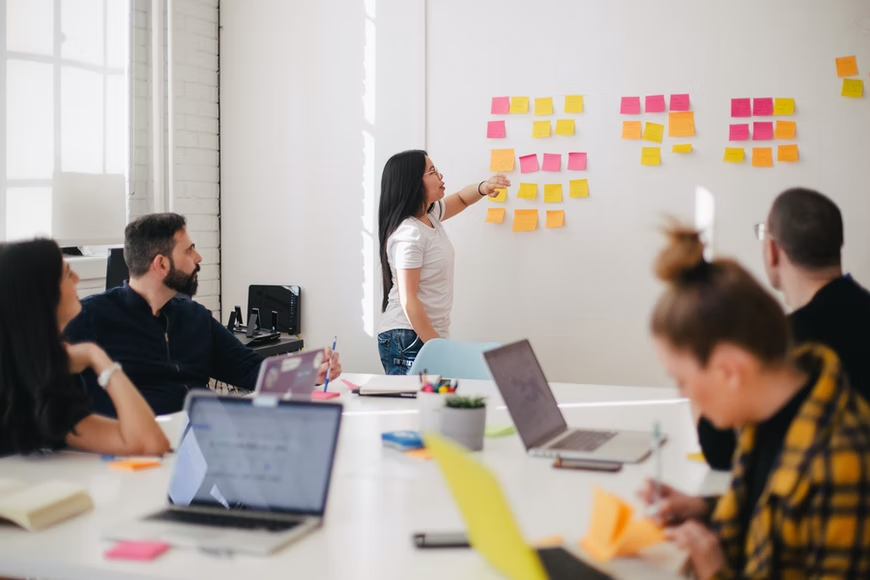

photo by [Jason Goodman](https://unsplash.com/@jasongoodman_youxventures) on [Unsplash](https://unsplash.com/)

#### Criado por [Francisco Tadeu Foz](https://www.linkedin.com/in/francisco-tadeu-foz/)

## Introdução



O Data Hackers, Bain & Company e a Vector realizaram em 2021, o maior mapeamento do cenário atual da área de dados do Brasil (o relatório completo está no site: www.stateofdata.com.br). Foram mais de 2600 participantes de diferentes localidades no Brasil.

No relatório foi possível identificar diversas perspectivas da área de dados, como a satisfação no emprego atual e os motivos de insatisfação. Numa visão geral, o principal motivo de insatisfação respondido foi o de "Falta de maturidade analítica na empresa".

Não é novidade que já há algum tempo a área vem crescendo e o mercado está aquecido, formando assim um desafio na retenção de profissionais e estruturação de equipes. 

Bom, **como aumentar a maturidade analítica da empresa com uma alta possibilidade de rotatividade de profissionais?**

**Focando na retenção de profissionais gestores**, para que assim possa amadurecer a estratégia e objetivos a médio e longo prazo, motivar e inspirar os demais profissionais.


Diante deste contexto, esta análise se propõe trazer insights a partir da satisfação no emprego atual de profissionais em cargo de gestão na área de dados.

## Sumário



1. [Configurações técnicas do notebook](#section-one)

2. [Importação dos dados](#section-two)

3. [Limpeza e transformação dos dados](#section-three)

4. [Análise](#section-four)

    - Motivos insatisfação
    - Gostaria de atuar em outra área
    - Situação do trabalho        
    - Motivo de insatisfação: Servidor público        
    - Setor
    - Participou de entrevistas nos últimos 6 meses?
    - Você pretende mudar de emprego nos próximos 6 meses?
    - Motivos insatisfação: "Em busca de oportunidades"
    - Motivos para decidir onde trabalhar: "Em busca de oportunidades"
    - Quantidade de pessoas atuando com dados na empresa
    - Quais responsabilidades fazem parte do seu dia a dia como gestor?
    
    
5. [Considerações finais](#section-five)




<a id="section-one"></a>
# 1. Configurações técnicas do notebook

In [1]:
### Bibliotecas utilizadas

# matplotlib==3.5.2
# squarify==0.4.3
# pandas==1.3.5
# seaborn==0.11.2

#Instalação
!pip install matplotlib==3.5.2
!pip install squarify==0.4.3
!pip install pandas==1.3.5
!pip install seaborn==0.11.2

#__________________________________________________________________#

#Importação de bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify 

#__________________________________________________________________#

#Configurações do notebook

## Configurações do DataFrame
pd.set_option('display.max.columns', 500)

## Configurações gerais das visualizações
custom_params = {'axes.spines.right': False,
                 'axes.spines.top': False,
                 'axes.spines.left': False,
                 'axes.spines.bottom': False}
sns.set_theme(context='notebook', style='white',rc=custom_params)

#__________________________________________________________________#

#Funções

def contar_valores_percentuais(dataframe,variavel):
  """
  Esta função irá gerar uma contar os valores de acordo com uma variável e 
  retornar em percentual.

  dataframe = DataFrame selecionado para realizar a contagem de valores.
  variavel = Variável do DataFrame que será contabilizada 
  """

  tabela_valores = dataframe[variavel].value_counts(normalize=True).to_frame('percentual')
  tabela_percentual = round((tabela_valores*100),2)

  return tabela_percentual

def frequencia_criterios_mudanca_emprego(dataframe):
  """
  Esta função irá gerar uma tabela de frequência dos critérios de mudança 
  de emprego.

  dataframe = seleção das colunas com os criterios de mudança de emprego
  do dataframe.

  """
  selecao_dos_criterios = dataframe.iloc[:,21:31]

  tabela_frequencia = selecao_dos_criterios.sum()/selecao_dos_criterios.sum().sum()
  tabela_frequencia_ordenada = tabela_frequencia.sort_values(ascending=False)
  tabela_frequencia_percentual = round((tabela_frequencia_ordenada * 100),2)

  return tabela_frequencia_percentual

def frequencia_desafios(dataframe):
  """
  Esta função irá gerar uma tabela de frequência dos desafios enfrentados pelos
  gestores.

  dataframe = seleção das colunas com os desafios da gerencia 
  no dataframe.

  """
  selecao_dos_desafios = dataframe.iloc[:,48:62]

  tabela_frequencia = selecao_dos_desafios.sum()/selecao_dos_desafios.sum().sum()
  tabela_frequencia_ordenada = tabela_frequencia.sort_values(ascending=False)
  tabela_frequencia_percentual = round((tabela_frequencia_ordenada * 100),2)

  return tabela_frequencia_percentual

def frequencia_motivo_insatisfacao(dataframe):
  """
  Esta função irá gerar uma tabela de frequência do motivo de insatisfação.

  dataframe = seleção das colunas com os motivos do dataframe.

  """
  selecao_dos_motivos = dataframe.iloc[:,11:18]

  tabela_frequencia = selecao_dos_motivos.sum()/selecao_dos_motivos.sum().sum()
  tabela_frequencia_ordenada = tabela_frequencia.sort_values(ascending=False).to_frame('percentual')
  tabela_frequencia_percentual = round((tabela_frequencia_ordenada * 100),2)

  return tabela_frequencia_percentual

def frequencia_responsabilidades(dataframe):
  """
  Esta função irá gerar uma tabela de frequência das responsabilidades 
  exercidas pelos gestores.

  dataframe = seleção das colunas com as responsabilidades da gerencia 
  no dataframe.

  """
  selecao_das_responsabilidades = dataframe.iloc[:,37:47]

  tabela_frequencia = selecao_das_responsabilidades.sum()/selecao_das_responsabilidades.sum().sum()
  tabela_frequencia_ordenada = tabela_frequencia.sort_values(ascending=False)
  tabela_frequencia_percentual = round((tabela_frequencia_ordenada * 100),2)

  return tabela_frequencia_percentual



<a id="section-two"></a>
## Importação dos dados

In [2]:
dados = pd.read_csv('../input/state-of-data-2021/State of Data 2021 - Dataset - Pgina1.csv',engine='python')

<a id="section-three"></a>
## Limpeza e transformação dos dados

In [3]:
#Seleção de dados

dados_selecionados = dados.iloc[:,[0,5,11,12,14,15,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
                                   40,41,42,43,44,45,46,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,
                                   77,78,79,80,81,82,83,84,85]]

dados_selecionados.columns = ['id',
                              'uf_onde_mora',
                              'situacao_trabalho',
                              'setor_empresa',
                              'atua_na_gestao',
                              'cargo_gestao',
                              'faixa_salarial',
                              'anos_de_experiencia_em_dados',
                              'anos_experiencia_em_TI',
                              'satifacao_empresa_atual',
                              'motivo_insatisfacao',
                              'falta_oportunidade_crescimento',
                              'salario_não_corresponde_ao_mercado',
                              'nao_tenho_uma_boa_relacao_com_gestor',
                              'gostaria_de_trabalhar_em_outra_area',
                              'gostaria_de_receber_mais_beneficios',
                              'clima_de_trabalho_nao_e_bom',
                              'falta_de_maturidade_analitica_empresa',
                              'voce_participou_de_entrevistas_emprego_ultimos_6_meses',
                              'voce_pretende_mudar_emprego_nos_proximos_6_meses',
                              'quais_os_principais_criterios_que_voce_leva_em_consideracao_no_momento_de_decidir_onde_trabalhar',
                              'remuneracao_salario',
                              'beneficios',
                              'proposito_trabalho_empresa',
                              'flexibilidade_de_trabalho_remoto',
                              'ambiente_e_clima_trabalho',
                              'oportunidade_aprendizado_e_trabalhar_com_referencias_na_area',
                              'plano_carreira_e_oportunidade_de_crescimento_profissional',
                              'maturidade_da_empresa_em_termos_de_tecnologia_e_dados',
                              'qualidade_dos_gestores_e_lideres',
                              'reputacao_que_a_empresa_tem_no_mercado',
                              'atualmente_qual_a_sua_forma_de_trabalho',
                              'qual_a_forma_de_trabalho_ideal_para_voce',
                              'caso_sua_empresa_decida_pelo_modelo_100_presencial_qual_sera_sua_atitude',
                              'qual_o_numero_aproximado_de_pessoas_que_atuam_com_dados_na_sua_empresa_hoje',
                              'quais_dessas_responsabilidades_fazem_parte_da_sua_rotina_atual_de_trabalho_como_gestor',
                              'pensar_na_visao_de_longo_prazo_de_dados_da_empresa_e_fortalecimento_da_cultura_analitica_das_companhia',
                              'organizacao_de_treinamentos_e_iniciativas_com_o_objetivo_de_aumentar_a_maturidade_analitica_das_areas_de_negocios',
                              'atracao_selecao_e_contratacao_de_talentos_para_o_time_de_dados', 
                              'decisao_sobre_contratacao_de_ferramentas_e_tecnologias_relacionadas_a_dados',
                              'sou_gestor_da_equipe_responsavel_pela_engenharia_de_dados_e_por_manter_o_Data_Lake_da_empresa_como_fonte_unica_dos_dados_garantindo_qualidade_e_confiabilidade_da_informacao',
                              'sou_gestor_da_equipe_responsavel_pela_entrega_de_dados_estudos_relatorios_e_dashboards_para_as_areas_de_negocio_da_empresa',
                              'sou_gestor_da_equipe_responsavel_por_iniciativas_e_projetos_envolvendo_inteligencia_artificial_e_machine_learning',
                              'apesar_de_ser_gestor_ainda_atuo_na_parte_tecnica_construindo_solucoes_analises_modelos_etc',
                              'gestao_de_projetos_de_dados_cuidando_das_etapas_equipes_envolvidas',
                              'gestao_de_produtos_de_dados_cuidando_da_visao_dos_produtos_backlog_feedback_de_usuarios_etc',
                              'gestao_de_pessoas_apoio_no_desenvolvimento_das_pessoas_evolucao_de_carreira',
                              'quais_sao_os_3_maiores_desafios_que_voce_tem_como_gestor_no_atual_momento',
                              'a_contratar_novos_talentos',
                              'reter_talentos',
                              'convencer_a_empresa_a_aumentar_os_investimentos_na_area_de_dados',
                              'gestao_equipes_no_ambiente_remoto',
                              'gestao_de_projetos_envolvendo_areas_multidisciplinares_da_empresa',
                              'organizar_as_informacoes_e_garantir_a_qualidade_e_confiabilidade',
                              'conseguir_processar_e_armazenar_um_alto_volume_de_dados',
                              'conseguir_gerar_valor_para_as_areas_de_negocios_atraves_de_estudos_e_experimentos',
                              'desenvolver_e_manter_modelos_machine_learning_em_producao',
                              'gerenciar_a_expectativa_das_areas_de_negocio_em_relacao_as_entregas_das_equipes_de_dados',
                              'garantir_a_manutencao_dos_projetos_e_modelos_em_producao_em_meio_ao_crescimento_da_empresa',
                              'conseguir_levar_inovacao_para_a_empresa_atraves_dos_dados',
                              'garantir_retorno_do_investimento_ROI_em_projetos_de_dados',
                              'dividir_o_tempo_entre_entregas_tecnicas_e_gestao',
                              'mesmo_que_esse_nao_seja_seu_cargo_formal_voce_considera_que_sua_atuacao_no_dia_a_dia_reflete_alguma_das_opcoes_listadas_abaixo',
                              'atuacao']


# Para esta análise foram considerados apenas as pessoas que estariam trabalhando no Brasil.

dados_selecionados = dados_selecionados.query('uf_onde_mora != "Exterior"')

# Com as seguintes respostas:

situacao_trabalho_filtro = ['Empregado (CLT)', 'Empreendedor ou Empregado (CNPJ)','Servidor Público']
dados_selecionados = dados_selecionados.query('situacao_trabalho == @situacao_trabalho_filtro')

#Filtrando apenas pessoas que atuam em cargos de liderança/gestão.

dados_selecionados = dados_selecionados.query('atua_na_gestao == 1')

# Dentre essa seleção, havia um ID duplicado: "yrhjxwscdfl516bibgi0kyrhait8fbnf"
# No qual irei excluir.

dados_selecionados = dados_selecionados.drop_duplicates()

# Duas pessoas não responderam que estavam ou não satisfeitas. Por este motivo irei desconsiderar elas.

dados_selecionados = dados_selecionados.query("satifacao_empresa_atual == 1 or satifacao_empresa_atual == 0")



<a id="section-four"></a>
## Análise

Após a limpeza inicial, foram selecionados 479 profissionais gestores em dados.

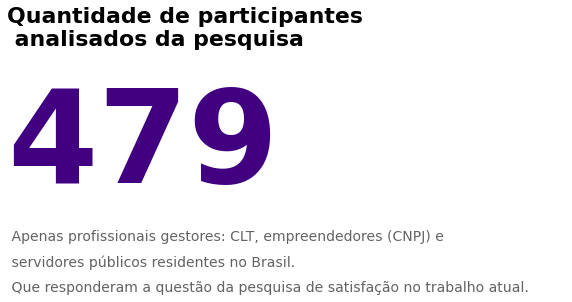

In [4]:
plt.figure(figsize=(10, 4),                                                    
           facecolor='white')                                                   

plt.axis(False)

plt.text(0, 1.03,                                                               
         'Quantidade de participantes \n analisados da pesquisa',  
         fontsize=22,                                                             
         color='black',                                                         
         weight="bold")                                                         

plt.text(0, 0.40,                                                               
         '$\\bf{479}$',                                                                           
         fontsize=130,                                                         
         color='#400080')                                                  

plt.text(0,-0.1,                                                                  
         ' Apenas profissionais gestores: CLT, empreendedores (CNPJ) e \n servidores públicos residentes no Brasil. \n Que responderam a questão da pesquisa de satisfação no trabalho atual.',
         fontsize=14,                                                           
         color='#616364',                                                       
         linespacing=2)       
plt.show() 

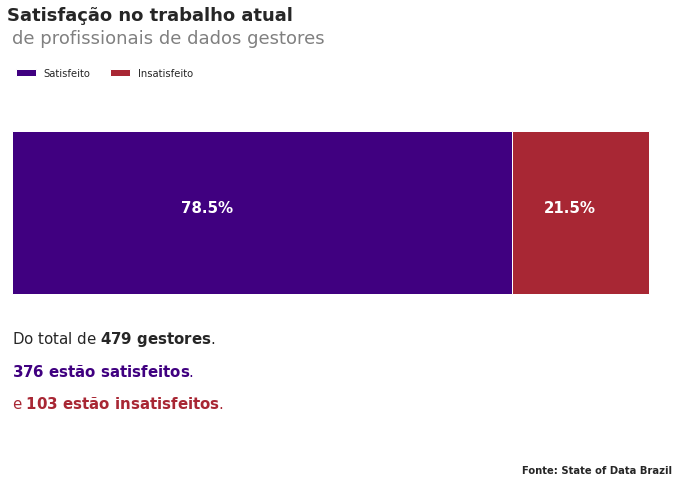

In [5]:
#Tabela de frequência de percentual de satisfeitos insatisfeitos
tabela_freq_insatisfeitos_satisfeitos = contar_valores_percentuais(dados_selecionados,'satifacao_empresa_atual')
tabela_freq_insatisfeitos_satisfeitos.rename(index={1:'Satisfeito',0:'Insatisfeito'},inplace=True)

# Gráfico
grafico = tabela_freq_insatisfeitos_satisfeitos.T.plot(kind='barh',
                                                       stacked=True,
                                                       figsize=(12,6),
                                                       color=['#400080','#A82734'],
                                                       fontsize=15)
plt.axis(False)
plt.legend(loc=(0,0.9),fontsize=10,ncol=2,frameon=False)

#Adicionando título e subtítulo
plt.suptitle('Satisfação no trabalho atual',
             x=0.12,
             ha='left',
             size=18,
             fontweight='bold')
plt.title('de profissionais de dados gestores',
          fontsize=18,loc='left',
          color='grey')

#Adicionando o rótulo de dados nas barras
plt.text((tabela_freq_insatisfeitos_satisfeitos.percentual[1]+5),0,
         str(tabela_freq_insatisfeitos_satisfeitos.percentual[0]) + '%',
         fontweight ='bold',                                                    
         fontsize = 15,
         color='white')
plt.text((tabela_freq_insatisfeitos_satisfeitos.percentual[0]+5),0,
         str(tabela_freq_insatisfeitos_satisfeitos.percentual[1]) + '%',
         fontweight ='bold',                                                    
         fontsize = 15,
         color='white')

#Adicionando texto da narrativa do gráfico
plt.text(0, -0.4,                                                             
         'Do total de $\\bf{ 479 \\ gestores}$.',
         fontsize=15)                                                                       

plt.text(0, -0.5,                                                             
         '$\\bf{ 376 \\ estão \\ satisfeitos}$.' ,                             
         fontsize=15,                                                           
         color='#400080')                                                       

plt.text(0, -0.6,                                                            
         'e $\\bf{ 103 \\ estão \\ insatisfeitos}$.' ,                        
         fontsize=15,                                                           
         color='#A82734')                                                  

plt.text(80,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)                                                          

plt.show()

Podemos observar que a maior parte dos gestores estão satisfeitos, mas para entender melhor o contexto irei detalhar com as demais variáveis.

In [6]:
# Divisão entre pessoas satisfeitas e insatisfeitas
satisfeitas = dados_selecionados.query("satifacao_empresa_atual == 1")
insatisfeitas = dados_selecionados.query("satifacao_empresa_atual == 0")

<a id="#section-five"></a>
### Motivos insatisfação

In [7]:
#Dicionário com frases formatadas
dicionario_motivos = {'falta_de_maturidade_analitica_empresa': 'Falta de maturidade analítica da empresa',
                      'falta_oportunidade_crescimento': 'Falta oportunidade de crescimento', 
                      'gostaria_de_trabalhar_em_outra_area':'Gostaria de trabalhar em outra área',
                      'salario_não_corresponde_ao_mercado':'Salário não corresponde ao mercado',
                      'clima_de_trabalho_nao_e_bom':'Clima de trabalho não é bom',
                      'gostaria_de_receber_mais_beneficios':'Gostaria de receber mais benefícios',
                      'nao_tenho_uma_boa_relacao_com_gestor':'Não tenho uma boa relação com a gestão'}

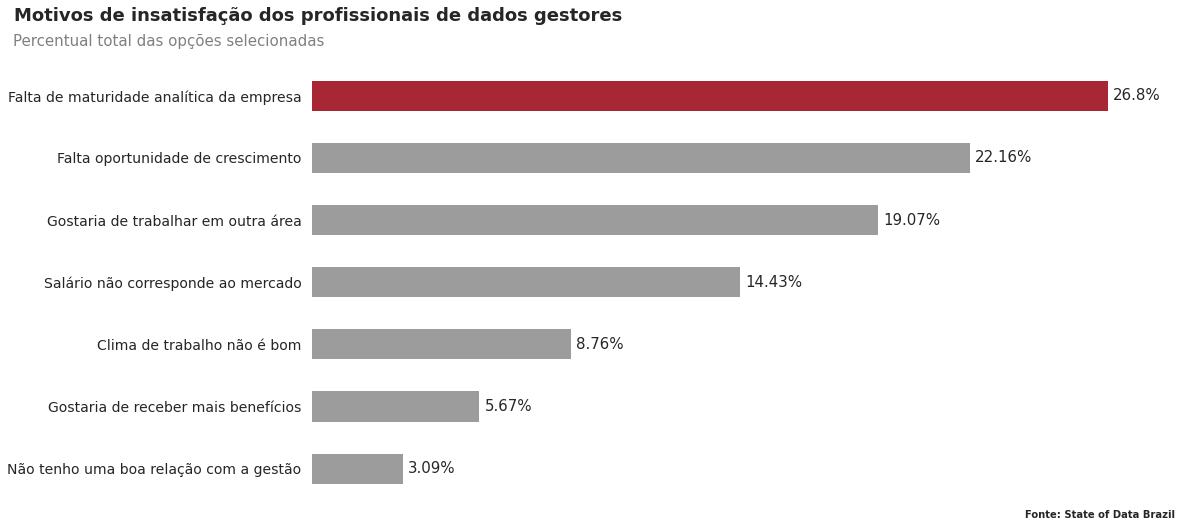

In [8]:
#Tabela de frequencia de motivos de insatisfação das pessoas insatisfeitas
insatisfeitas_motivo_insatisfacao = frequencia_motivo_insatisfacao(insatisfeitas)
insatisfeitas_motivo_insatisfacao.index = insatisfeitas_motivo_insatisfacao.index.map(dicionario_motivos)

#Gráfico
insatisfeitas_motivo_insatisfacao = insatisfeitas_motivo_insatisfacao.sort_values(by='percentual',ascending=True)
insatisfeitas_motivo_insatisfacao = insatisfeitas_motivo_insatisfacao.squeeze()

g = insatisfeitas_motivo_insatisfacao.plot(kind='barh',
                                           figsize=(15,8),
                                           xticks=([]),
                                           legend=False,
                                           color=list(['#9C9C9C']*6+['#A82734']))
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)


#Adicionando título e subtítulo
plt.suptitle('Motivos de insatisfação dos profissionais de dados gestores',
             x=-0.15,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-10,6.8,
         'Percentual total das opções selecionadas',                                                
         fontsize = 15,
         color='grey') 
plt.text(24,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()


Dentre os gestores, o motivo de insatisfação com maior frequência entre todas as respostas também continua sendo o de falta de maturidade analítica da empresa.

In [9]:
#Tabela com valores únicos das respostas
motivos_insatisfacao = insatisfeitas.iloc[:,11:18]
motivos_insatisfacao.value_counts().reset_index().head()

,falta_oportunidade_crescimento,salario_não_corresponde_ao_mercado,nao_tenho_uma_boa_relacao_com_gestor,gostaria_de_trabalhar_em_outra_area,gostaria_de_receber_mais_beneficios,clima_de_trabalho_nao_e_bom,falta_de_maturidade_analitica_empresa,0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


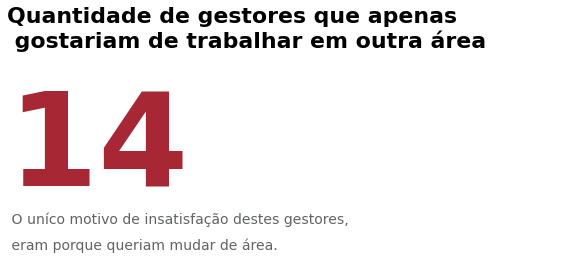

In [10]:
#Gráfico
plt.figure(figsize=(10, 4),                                                    
           facecolor='white')                                                   

plt.axis(False)

plt.text(0, 1.03,                                                               
         'Quantidade de gestores que apenas \n gostariam de trabalhar em outra área',  
         fontsize=22,                                                             
         color='black',                                                         
         weight="bold")                                                         

plt.text(0, 0.40,                                                               
         '$\\bf{14}$',                                                                           
         fontsize=130,                                                         
         color='#A82734')                                                  

plt.text(0,0.1,                                                                  
         ' O uníco motivo de insatisfação destes gestores, \n eram porque queriam mudar de área.',
         fontsize=14,                                                           
         color='#616364',                                                       
         linespacing=2)       
plt.show() 

Dentre essa pergunta do motivo de insatisfação, haviam 5 opções de respostas e maior quantidade foi a que queriam trabalhar em outra área apenas. 

<a id="#subsection-two"></a>
#### Gostaria de atuar em outra área

In [11]:
gostaria_de_trabalhar_em_outra_area = dados_selecionados.query("gostaria_de_trabalhar_em_outra_area == 1 and falta_oportunidade_crescimento == 0 and salario_não_corresponde_ao_mercado == 0 and nao_tenho_uma_boa_relacao_com_gestor == 0 and gostaria_de_receber_mais_beneficios == 0 and clima_de_trabalho_nao_e_bom ==0 and falta_de_maturidade_analitica_empresa ==0")
gostaria_de_trabalhar_em_outra_area[['anos_de_experiencia_em_dados','anos_experiencia_em_TI']].value_counts().to_frame('quantidade')

quantidade
anos_de_experiencia_em_dados           anos_experiencia_em_TI                                        
Não tenho experiência na área de dados Não tive experiência na área de TI/Engenharia d...           3
de 2 a 3 anos                          Não tive experiência na área de TI/Engenharia d...           2
Mais de 10 anos                        Não tive experiência na área de TI/Engenharia d...           1
                                       de 2 a 3 anos                                                1
Menos de 1 ano                         Mais de 10 anos                                              1
                                       Menos de 1 ano                                               1
Não tenho experiência na área de dados Mais de 10 anos                                              1
de 1 a 2 anos                          Mais de 10 anos                                              1
                                       Não tive experiência na área de TI/Engenharia d...           1
                                       de 1 a 2 anos                                                1
de 6 a 10 anos                         Mais de 10 anos                                              1

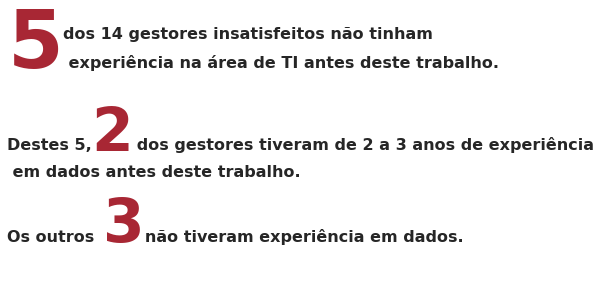

In [12]:
#Gráfico
plt.figure(figsize=(10, 4),                                                    
           facecolor='white')                                                   

plt.axis(False)                                                  

#Primeira frase
plt.text(0, 1,                                                               
         '$\\bf{5}$',                                                                           
         fontsize=80,                                                         
         color='#A82734')                                                  
plt.text(0.1, 1,                                                               
         'dos 14 gestores insatisfeitos não tinham \n experiência na área de TI antes deste trabalho.',  
         fontsize=16,                                                         
         weight='bold',
         linespacing=2)

#Segunda frase
plt.text(0.15, 0.62,                                                               
         '$\\bf{2}$',                                                                           
         fontsize=60,                                                         
         color='#A82734')   
plt.text(0, 0.5,                                                               
         'Destes 5,        dos gestores tiveram de 2 a 3 anos de experiência \n em dados antes deste trabalho.',  
         fontsize=16,                                                         
         weight='bold',
         linespacing=2)

#Terceira frase
plt.text(0.17, 0.2,                                                              
         '$\\bf{3}$',                                                                           
         fontsize=60,                                                         
         color='#A82734')  
plt.text(0, 0.2,                                                               
         'Os outros         não tiveram experiência em dados.',  
         fontsize=16,                                                         
         weight='bold',
         linespacing=2)    
       
plt.show()    

Dentre os profissionais gestores que estavam insatisfeitos apenas porque gostariam de mudar de área, 3 deles não tinham experiência em dados nem em TI antes da posição atual.

Os outros 2 também não tiveram experiência em dados anteriormente.

É possível que isso seja um indicador inicial que gestores em dados devem anteriormente terem passado por alguma experiência na área de dados e/ou TI.

<a id="#subsection-three"></a>

### Situação do trabalho

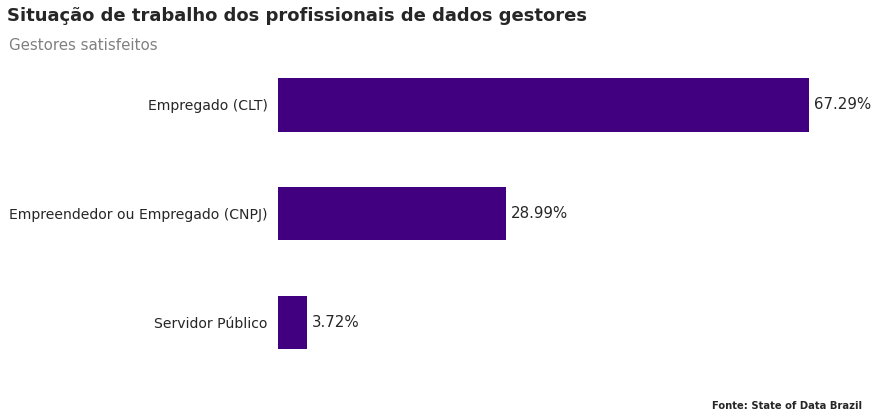

In [13]:
#Tabela de frequencia
satisfeitas_situacao_trabalho = contar_valores_percentuais(satisfeitas,'situacao_trabalho')
satisfeitas_situacao_trabalho = satisfeitas_situacao_trabalho.sort_values(by='percentual',ascending=True)

#Gráfico
g = satisfeitas_situacao_trabalho.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['#400080'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Situação de trabalho dos profissionais de dados gestores',
             x=-0.25,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-34,2.5,
         'Gestores satisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(55,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

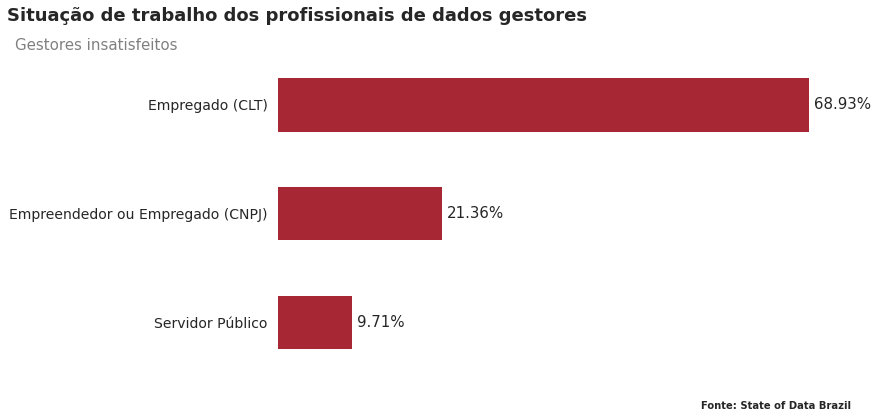

In [14]:
#Tabela de frequência
insatisfeitas_situacao_trabalho = contar_valores_percentuais(insatisfeitas,'situacao_trabalho')
insatisfeitas_situacao_trabalho = insatisfeitas_situacao_trabalho.sort_values(by='percentual',ascending=True)

#Gráfico
g = insatisfeitas_situacao_trabalho.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['#A82734'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Situação de trabalho dos profissionais de dados gestores',
             x=-0.25,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-34,2.5,
         'Gestores insatisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(55,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()


Dentre o comparativo da situação de trabalho dos gestores é possível observar que o número de servidores públicos insatisfeitos aumenta consideravelmente em relação aos satisfeitos.

Por esse motivo, detalharei quais são os motivos.


<a id="#subsection-four"></a>
### Motivo de insatisfação: Servidor público

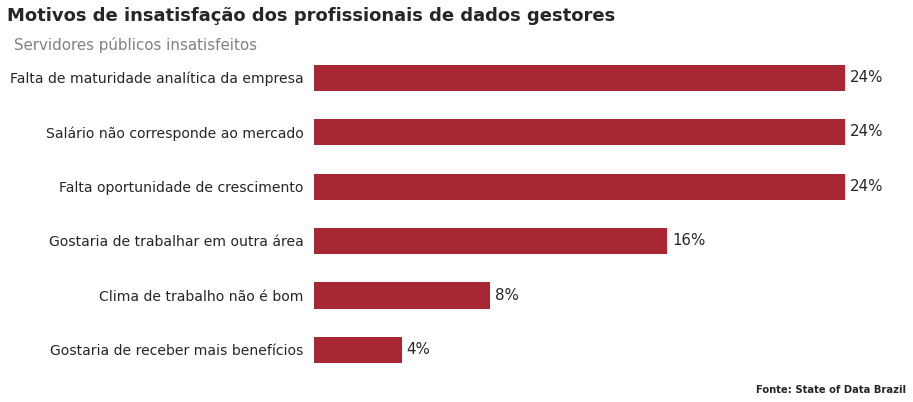

In [15]:
#Tabela de frequência
servidor_publico = insatisfeitas.query('situacao_trabalho == "Servidor Público"')
servidor_publico_motivo_insatisfacao = frequencia_motivo_insatisfacao(servidor_publico)
servidor_publico_motivo_insatisfacao = servidor_publico_motivo_insatisfacao[:-1]
servidor_publico_motivo_insatisfacao.index = servidor_publico_motivo_insatisfacao.index.map(dicionario_motivos)
servidor_publico_motivo_insatisfacao = servidor_publico_motivo_insatisfacao.sort_values(by='percentual',ascending=True)

#Gráfico
g = servidor_publico_motivo_insatisfacao.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['#A82734'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Motivos de insatisfação dos profissionais de dados gestores',
             x=-0.3,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-13.5,5.5,
         'Servidores públicos insatisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(20,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

Além da falta de maturidade analítica, um descontentamente com o salário e a falta de oportunidade de crescimento também lideram as posições dos principais motivos de insatisfação.


O setor público será um setor que há bastante insatisfação por parte dos gestores?
Verificarei no próximo item.

<a id="#subsection-five"></a>
### Setor

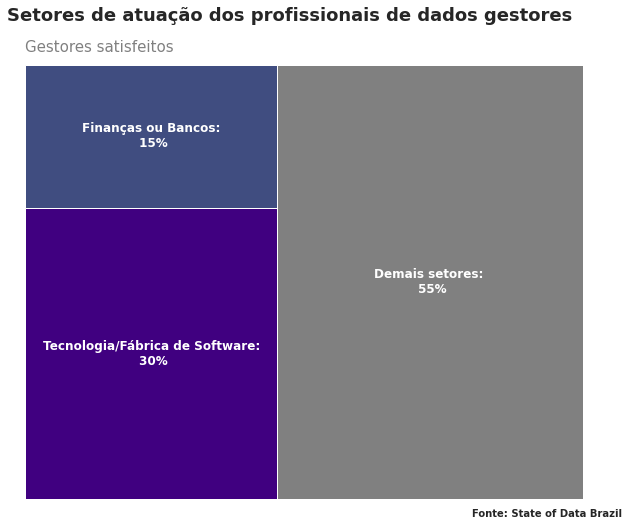

In [16]:
#Tabela de frequência
satisfeitas_setor = contar_valores_percentuais(satisfeitas,'setor_empresa')
satisfeitas_setor_principais = satisfeitas_setor[:2]
satisfeitas_demais_setores = satisfeitas_setor[2:].sum().to_frame('percentual')
satisfeitas_demais_setores.index = ['Demais setores']
satisfeitas_setores = pd.concat([satisfeitas_setor_principais,satisfeitas_demais_setores])

#Gráfico
plt.figure(figsize=(10,8))
squarify.plot(sizes=list(satisfeitas_setores.percentual), 
              label=['Tecnologia/Fábrica de Software:\n 30%', 'Finanças ou Bancos:\n 15%', 'Demais setores: \n 55%'], 
              color=['#400080','#404D80', "grey"],
              text_kwargs={'fontweight': 'bold','color':'white'})
plt.axis('off')

plt.suptitle('Setores de atuação dos profissionais de dados gestores',
             x=0.1,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(0,103,
         'Gestores satisfeitos',                                                
         fontsize = 15,
         color='grey') 

plt.text(80,-4,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

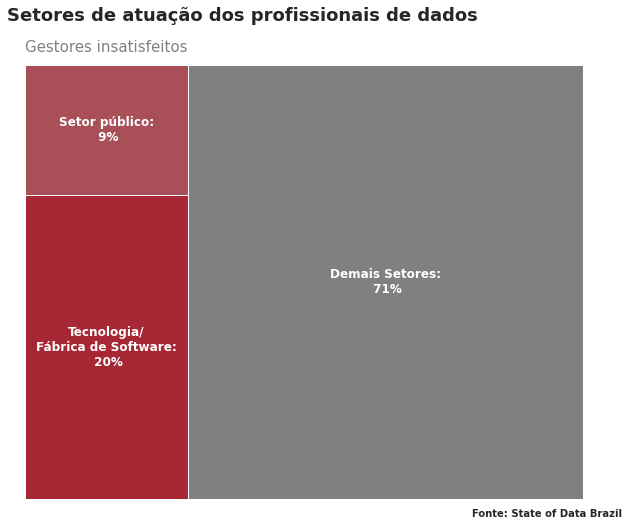

In [17]:
#Tabela de frequência
insatisfeitas_setores = contar_valores_percentuais(insatisfeitas,'setor_empresa')
insatisfeitas_setores_principais = insatisfeitas_setores[:2]
insatisfeitas_demais_setores = contar_valores_percentuais(insatisfeitas,'setor_empresa')
insatisfeitas_demais_setores = insatisfeitas_demais_setores[2:].sum().to_frame('percentual')
insatisfeitas_demais_setores.index = ['Demais setores']
insatisfeitas_setores = pd.concat([insatisfeitas_setores_principais,insatisfeitas_demais_setores])

#Gráfico
plt.figure(figsize=(10,8))
squarify.plot(sizes=list(insatisfeitas_setores.percentual), 
              label=['Tecnologia/\nFábrica de Software:\n 20%', 'Setor público:\n 9%','Demais Setores:\n 71%'], 
              color=['#A82734','#A84F58', "grey"],
              text_kwargs={'fontweight': 'bold','color':'white'})
plt.axis('off')

plt.suptitle('Setores de atuação dos profissionais de dados',
             x=0.1,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(0,103,
         'Gestores insatisfeitos',                                                
         fontsize = 15,
         color='grey') 

plt.text(80,-4,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

O setor de tecnologia lidera de principal atuação dos profissionais. 

De fato o setor público está na segunda posição dentre os setores dos gestores insatisfeitos.

Mesmo que seja a longo prazo, isso pode ser um alarme para o setor ter mais atenção a gestão e estratégia da área de dados para que não sofra as consequências futuras.
Consequências que possivelmente trarão prejuízos financeiros, seja em investimento em salários mais altos ou em terceirizações de soluções.


Também foi possível observar que o setor de finanças traz lidera a segunda posição dentre os gestores satisfeitos.

<a id="#subsection-six"></a>
### Participou de entrevistas nos últimos 6 meses?

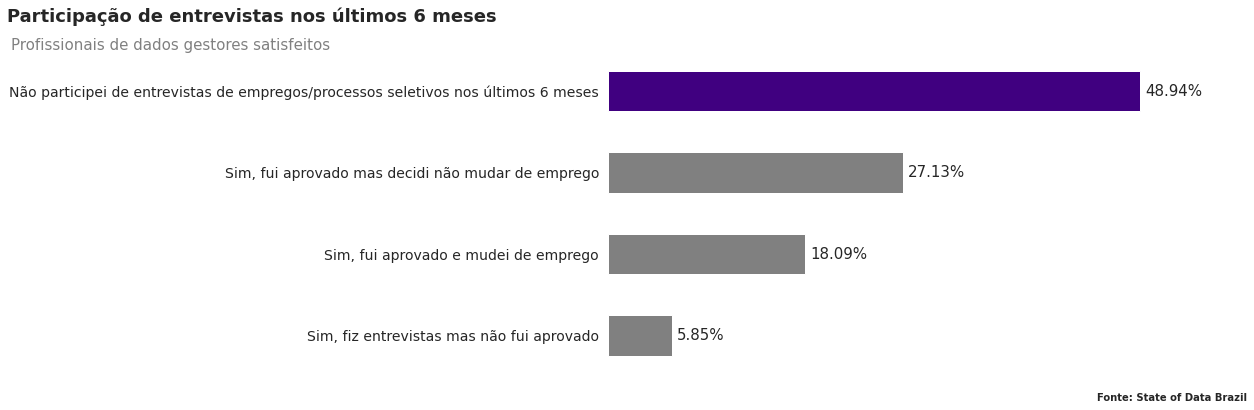

In [18]:
#Frequência
satisfeitas_participacao_entrevistas = contar_valores_percentuais(satisfeitas,'voce_participou_de_entrevistas_emprego_ultimos_6_meses')


#Gráfico
satisfeitas_participacao_entrevistas_ordenado = satisfeitas_participacao_entrevistas.sort_values(by='percentual',ascending=True).squeeze()

g = satisfeitas_participacao_entrevistas_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*3+['#400080'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Participação de entrevistas nos últimos 6 meses',
             x=-0.71,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-55,3.5,
         'Profissionais de dados gestores satisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(45,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

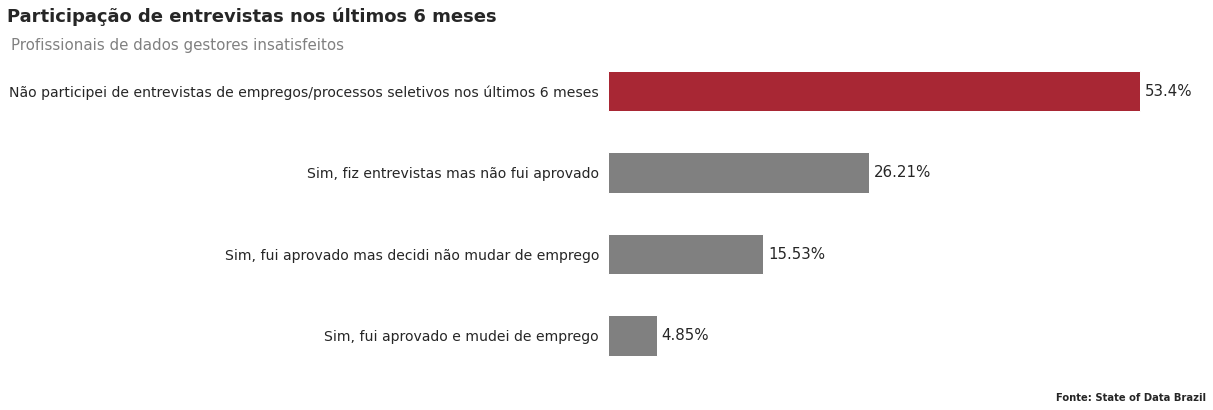

In [19]:
#Frequência
insatisfeitas_participacao_entrevistas = contar_valores_percentuais(insatisfeitas,'voce_participou_de_entrevistas_emprego_ultimos_6_meses')

#Gráfico
insatisfeitas_participacao_entrevistas_ordenado = insatisfeitas_participacao_entrevistas.sort_values(by='percentual',ascending=True).squeeze()

g = insatisfeitas_participacao_entrevistas_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*3+['#A82734'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Participação de entrevistas nos últimos 6 meses',
             x=-0.71,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-60,3.5,
         'Profissionais de dados gestores insatisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(45,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

Mesmo que com o mercado aquecido, a maior parte dos profissionais insatisfeitos não participaram de processos seletivos nos últimos 6 meses da pesquisa.

Pode ser que seja devido a economia mundial estar passando por dificuldades e/ou porque são profissionais que devido a sua posição enxergam uma "carreira" a médio/longo prazo em uma organização.

<a id="#subsection-seven"></a>
### Você pretende mudar de emprego nos próximos 6 meses? 

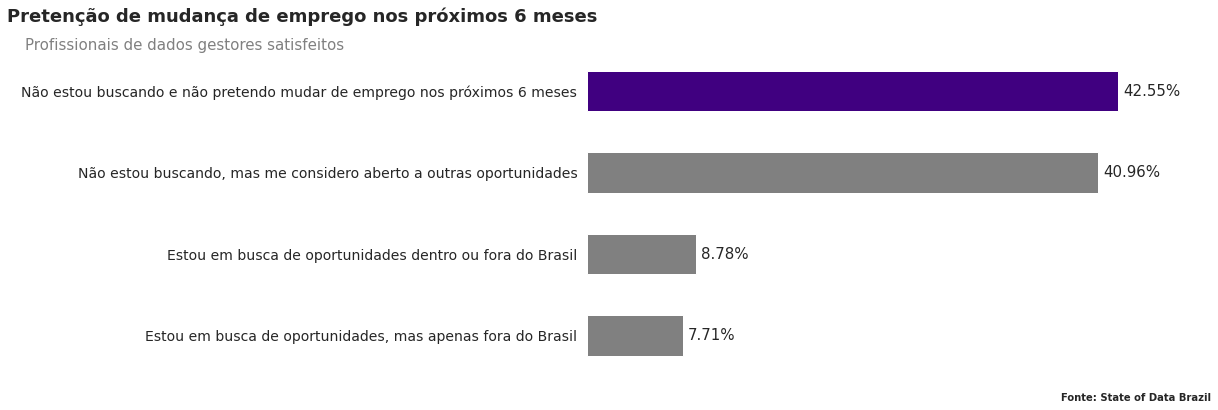

In [20]:
#Frequência
satisfeitas_pretende_mudar_emprego = contar_valores_percentuais(satisfeitas,'voce_pretende_mudar_emprego_nos_proximos_6_meses')

#Gráfico
satisfeitas_pretende_mudar_emprego_ordenado = satisfeitas_pretende_mudar_emprego.sort_values(by='percentual',ascending=True).squeeze()

g = satisfeitas_pretende_mudar_emprego_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*3+['#400080'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Pretenção de mudança de emprego nos próximos 6 meses',
             x=-0.68,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-45,3.5,
         'Profissionais de dados gestores satisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(38,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

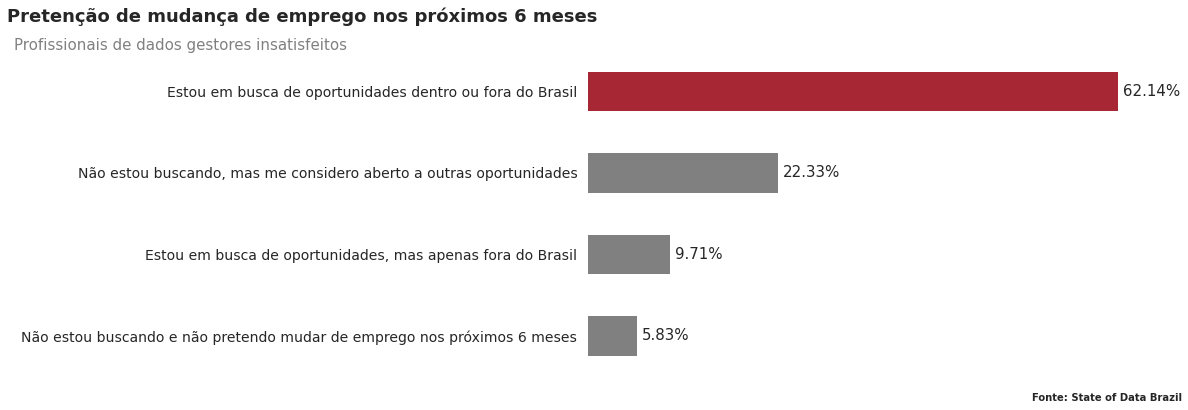

In [21]:
#Frequência
insatisfeitas_pretende_mudar_emprego = contar_valores_percentuais(insatisfeitas,'voce_pretende_mudar_emprego_nos_proximos_6_meses')

#Gráfico
insatisfeitas_pretende_mudar_emprego_ordenado = insatisfeitas_pretende_mudar_emprego.sort_values(by='percentual',ascending=True).squeeze()

g = insatisfeitas_pretende_mudar_emprego_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*3+['#A82734'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Pretenção de mudança de emprego nos próximos 6 meses',
             x=-0.68,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-67,3.5,
         'Profissionais de dados gestores insatisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(52,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

Talvez a participação em entrevistas seja por conta de fato da baixa na economia (cenário "pós pandemia"), pois a maior parte dos gestores insatisfeitos estão em busca de oportunidades.

É interessante perceber que mesmo entre os gestores satisfeitos, aproximadamente 41% não estão em busca, mas estão abertos a novas oportunidades.

O que mostra um grande desafio para as empresas e reter esses profissionais.

<a id="#subsection-eight"></a>
#### Motivos insatisfação: "Em busca de oportunidades"

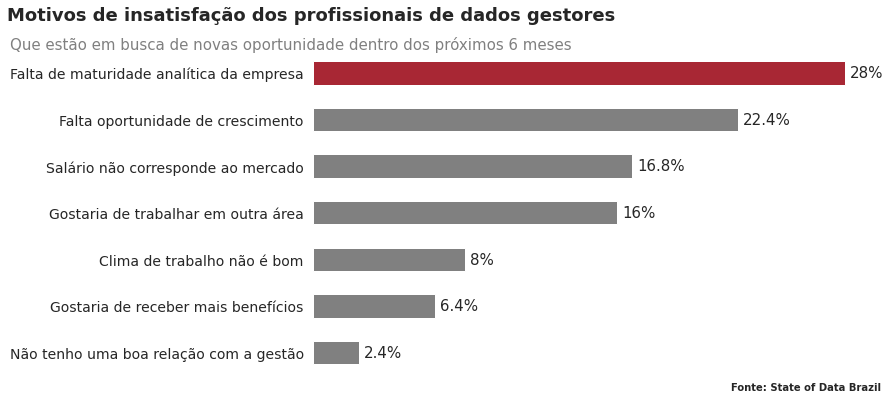

In [22]:
#Frequência
em_busca_oportunidades = insatisfeitas.query('voce_pretende_mudar_emprego_nos_proximos_6_meses == "Estou em busca de oportunidades dentro ou fora do Brasil"')
motivos_em_busca_oportunidades = frequencia_motivo_insatisfacao(em_busca_oportunidades)
motivos_em_busca_oportunidades.index = motivos_em_busca_oportunidades.index.map(dicionario_motivos)


#Grafico
motivos_em_busca_oportunidades_ordenado = motivos_em_busca_oportunidades.sort_values(by='percentual',ascending=True).squeeze()

g = motivos_em_busca_oportunidades_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*6+['#A82734'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Motivos de insatisfação dos profissionais de dados gestores',
             x=-0.30,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-16,6.5,
         'Que estão em busca de novas oportunidade dentro dos próximos 6 meses',                                                
         fontsize = 15,
         color='grey') 
plt.text(22,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

Dentre os profissionais que estão em busca de oportunidades o motivo de falta de maturidade analítica continuando liderando o motivo, entretanto a falta de oportunidade de crescimento também entra em segunda posição.


<a id="#subsection-nine"></a>
### Motivos para decidir onde trabalhar: "Em busca de oportunidades"

In [23]:
#Formatação dos critérios
dicionario_criterios = {'remuneracao_salario': 'Remuneração/salário',
                        'flexibilidade_de_trabalho_remoto': 'Flexibilidade do trabalho remoto',
                        'oportunidade_aprendizado_e_trabalhar_com_referencias_na_area':'Oportunidade de aprendizado e de trabalhar com referências na área',
                        'ambiente_e_clima_trabalho':'Ambiente e clima de trabalho',
                        'plano_carreira_e_oportunidade_de_crescimento_profissional':'Plano de carreira e oportunidade de crescimento profissional',
                        'proposito_trabalho_empresa':'Propósito de trabalho das empresas',
                        'maturidade_da_empresa_em_termos_de_tecnologia_e_dados':'Maturidade da empresa em termos de tecnologia e dados',
                        'qualidade_dos_gestores_e_lideres':'Qualidade dos gestores e líderes',
                        'beneficios':'Benefícios',
                        'reputacao_que_a_empresa_tem_no_mercado':'Reputação que a empresa tem no mercado'}

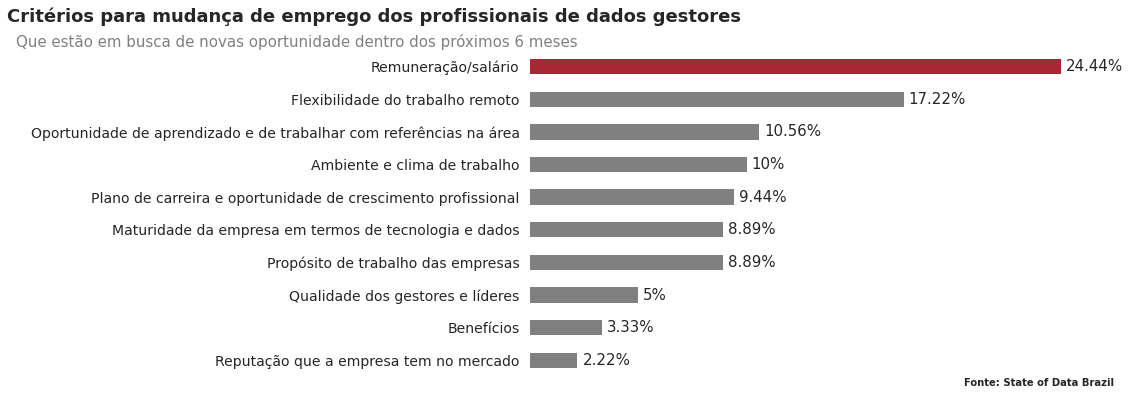

In [24]:
#Tabela de frequência
criterios_em_busca_oportunidades = frequencia_criterios_mudanca_emprego(em_busca_oportunidades).to_frame('percentual')
criterios_em_busca_oportunidades.index = criterios_em_busca_oportunidades.index.map(dicionario_criterios)


#Gráfico
criterios_em_busca_oportunidades_ordenado = criterios_em_busca_oportunidades.sort_values(by='percentual',ascending=True).squeeze()

g = criterios_em_busca_oportunidades_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*9+['#A82734'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Critérios para mudança de emprego dos profissionais de dados gestores',
             x=-0.60,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-23.6,9.6,
         'Que estão em busca de novas oportunidade dentro dos próximos 6 meses',                                                
         fontsize = 15,
         color='grey') 
plt.text(20,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

Quando olhamos os critérios de saída dos profissionais, a remuneração é o principal fator.


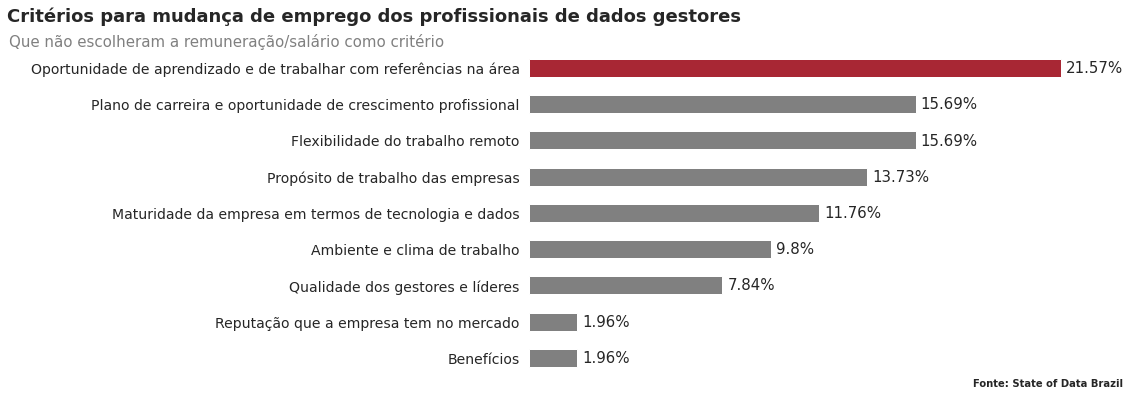

In [25]:
#Tabela de frequência
motivos_nao_salarial = em_busca_oportunidades.query('remuneracao_salario == 0')
criterios_em_busca_oportunidades_motivo_nao_salarial = frequencia_criterios_mudanca_emprego(motivos_nao_salarial).to_frame('percentual')
criterios_em_busca_oportunidades_motivo_nao_salarial.index = criterios_em_busca_oportunidades_motivo_nao_salarial.index.map(dicionario_criterios)
criterios_em_busca_oportunidades_motivo_nao_salarial = criterios_em_busca_oportunidades_motivo_nao_salarial[:-1]

#Gráfico
criterios_em_busca_oportunidades_motivo_nao_salarial_ordenado = criterios_em_busca_oportunidades_motivo_nao_salarial.sort_values(by='percentual',ascending=True).squeeze()

g = criterios_em_busca_oportunidades_motivo_nao_salarial_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*8+['#A82734'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Critérios para mudança de emprego dos profissionais de dados gestores',
             x=-0.60,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-21.1,8.6,
         'Que não escolheram a remuneração/salário como critério',                                                
         fontsize = 15,
         color='grey') 
plt.text(18,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

Agora, os profissionais que não tem como critério a remunuração/salário, querem ter uma oportunidade de aprendizado e crescimento profissional.

O que não é de se surpreender, pois provavelmente a quantidade de conhecimento, capacidade de entrega de valor e "networking" são elementos que contribuem para a satisfação pessoal/profissional e são fatores decisivos para que a médio/longo prazo a faixa salarial também suba.

<a id="#subsection-ten"></a>
### Quantidade de pessoas atuando com dados na empresa

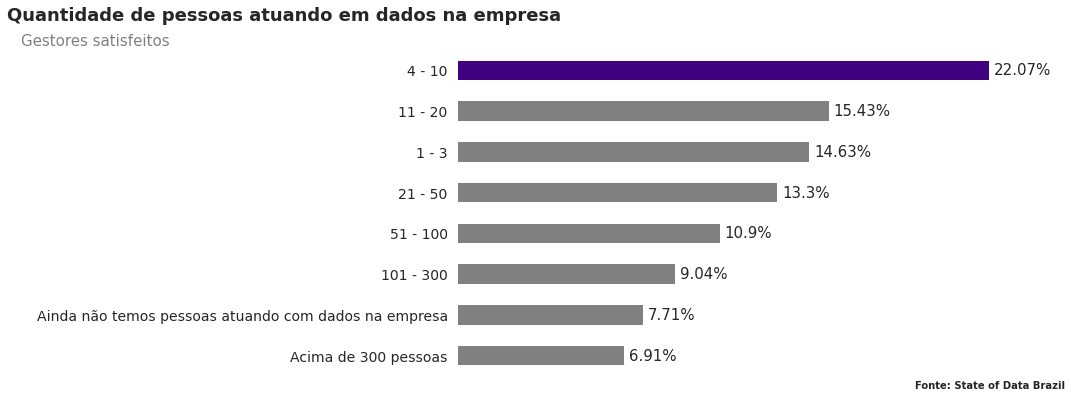

In [26]:
#Tabela de frequência
satisfeitas_pessoas_em_dados = contar_valores_percentuais(satisfeitas,'qual_o_numero_aproximado_de_pessoas_que_atuam_com_dados_na_sua_empresa_hoje')

#Gráfico
satisfeitas_pessoas_em_dados_ordenado = satisfeitas_pessoas_em_dados.sort_values(by='percentual',ascending=True).squeeze()

g = satisfeitas_pessoas_em_dados_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*7+['#400080'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Quantidade de pessoas atuando em dados na empresa',
             x=-0.50,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-18.1,7.6,
         'Gestores satisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(19,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

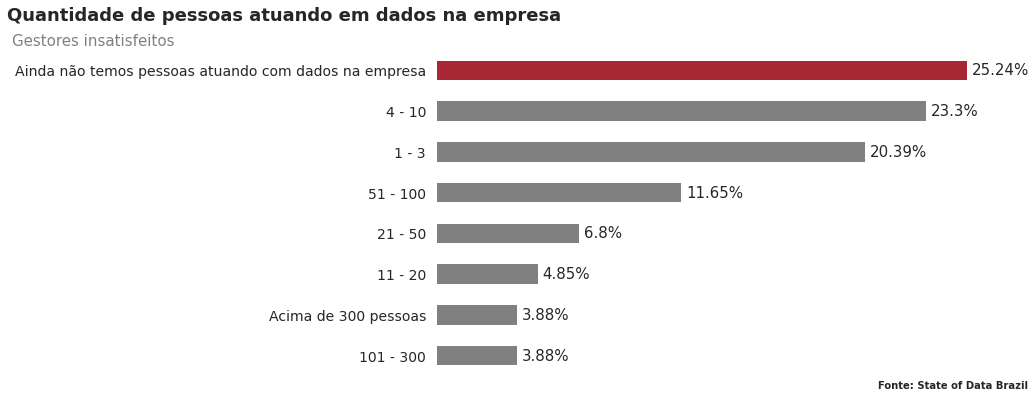

In [27]:
#Tabela de frequência
insatisfeitas_pessoas_em_dados = contar_valores_percentuais(insatisfeitas,'qual_o_numero_aproximado_de_pessoas_que_atuam_com_dados_na_sua_empresa_hoje')

#Gráfico
insatisfeitas_pessoas_em_dados_ordenado = insatisfeitas_pessoas_em_dados.sort_values(by='percentual',ascending=True).squeeze()

g = insatisfeitas_pessoas_em_dados_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*7+['#A82734'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Quantidade de pessoas atuando em dados na empresa',
             x=-0.47,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-20.1,7.6,
         'Gestores insatisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(21,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

Podemos aqui perceber a relação da "maturidade analítica da empresa", "quantidade de pessoas atuando com dados" e "satisfação dos gestores" se relacionarem.

Não ter uma área específica na empresa atuando com dados, pode levar a gestores se tornarem insatisfeitos, devido a dificuldade de gerenciamento de projetos e entrega de valor a organização.

<a id="#subsection-eleven"></a>
### Quais responsabilidades fazem parte do seu dia a dia como gestor?

In [28]:
#Dicionário para formatar as responsabilidades
dicionario_responsabilidades = {
    'gestao_de_pessoas_apoio_no_desenvolvimento_das_pessoas_evolucao_de_carreira': 'Gestão de pessoas e apoio no desenvolvimento e evolução de carreira',
    'atracao_selecao_e_contratacao_de_talentos_para_o_time_de_dados': 'Atração, seleção e contratação de talentos para o time de dados',
    'sou_gestor_da_equipe_responsavel_pela_entrega_de_dados_estudos_relatorios_e_dashboards_para_as_areas_de_negocio_da_empresa':'Sou gestor da equipe responsável pela entrega de dados, estudos, \n relatórios e dashboards para as áreas de negócio da empresa',
    'gestao_de_projetos_de_dados_cuidando_das_etapas_equipes_envolvidas':'Gestão de projetos de dados cuidando das etapas e equipes envolvidas',
    'decisao_sobre_contratacao_de_ferramentas_e_tecnologias_relacionadas_a_dados':'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados',
    'apesar_de_ser_gestor_ainda_atuo_na_parte_tecnica_construindo_solucoes_analises_modelos_etc':'Apesar de ser gestor ainda atuo na parte técnica\n construindo soluções, análises, modelos etc',
    'organizacao_de_treinamentos_e_iniciativas_com_o_objetivo_de_aumentar_a_maturidade_analitica_das_areas_de_negocios':'Organização de treinamentos e iniciativas com o objetivo\n de aumentar a maturidade analítica das áreas de negócios',
    'sou_gestor_da_equipe_responsavel_por_iniciativas_e_projetos_envolvendo_inteligencia_artificial_e_machine_learning':'Sou gestor da equipe responsável por iniciativas\n e projetos envolvendo inteligência artificial e machine learning',
    'gestao_de_produtos_de_dados_cuidando_da_visao_dos_produtos_backlog_feedback_de_usuarios_etc':'Gestão de produtos de dados cuidando da visão dos produtos,\n backlog, feedback de usuários etc',
    'sou_gestor_da_equipe_responsavel_pela_engenharia_de_dados_e_por_manter_o_Data_Lake_da_empresa_como_fonte_unica_dos_dados_garantindo_qualidade_e_confiabilidade_da_informacao':'Sou gestor da equipe responsável pela engenharia de dados e \npor manter o Data Lake da empresa como fonte única dos dados\n garantindo qualidade e confiabilidade da informação'}

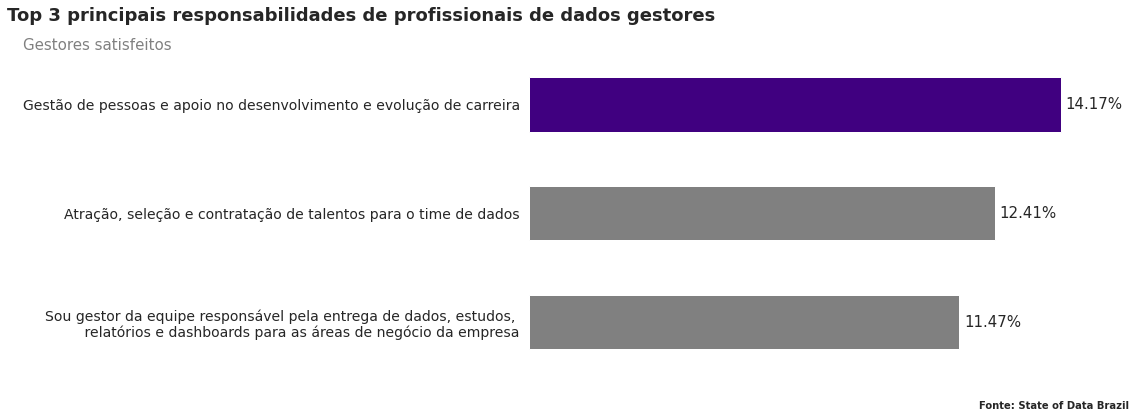

In [29]:
#Tabela de frequência
satisfeitas_responsabilidade = frequencia_responsabilidades(satisfeitas).to_frame('percentual')
satisfeitas_responsabilidade.index = satisfeitas_responsabilidade.index.map(dicionario_responsabilidades)
satisfeitas_top3_responsabilidades = satisfeitas_responsabilidade[:3] 

#Gráfico
satisfeitas_responsabilidade_ordenado = satisfeitas_top3_responsabilidades.sort_values(by='percentual',ascending=True).squeeze()

g = satisfeitas_responsabilidade_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*2+['#400080'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Top 3 principais responsabilidades de profissionais de dados gestores',
             x=-0.6,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-13.5,2.5,
         'Gestores satisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(12,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

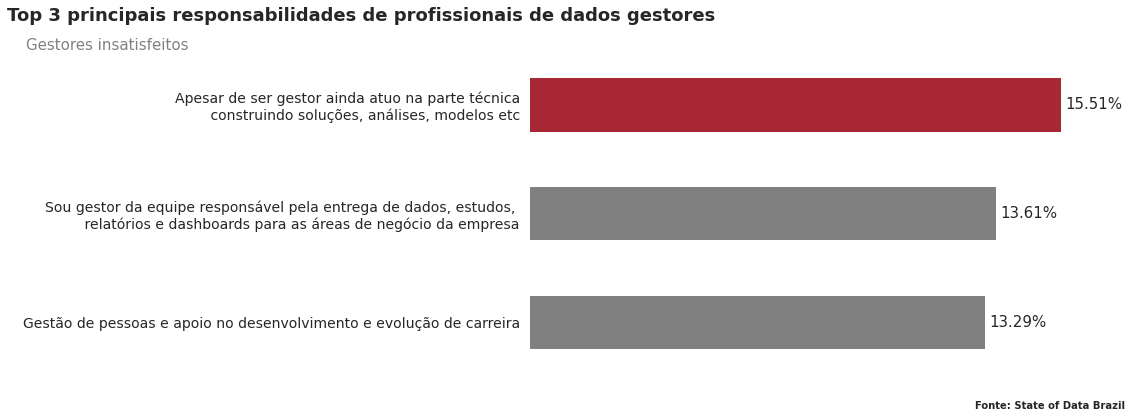

In [30]:
#Tabela de frequência
insatisfeitas_responsabilidade = frequencia_responsabilidades(insatisfeitas).to_frame('percentual')
insatisfeitas_responsabilidade.index = insatisfeitas_responsabilidade.index.map(dicionario_responsabilidades)
insatisfeitas_top3_responsabilidades = insatisfeitas_responsabilidade[:3]

#Gráfico
insatisfeitas_responsabilidade_ordenado = insatisfeitas_top3_responsabilidades.sort_values(by='percentual',ascending=True).squeeze()

g = insatisfeitas_responsabilidade_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*2+['#A82734'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Top 3 principais responsabilidades de profissionais de dados gestores',
             x=-0.6,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-14.7,2.5,
         'Gestores insatisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(13,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

Podemos perceber dentre os gestores insatisfeitos, a responsabilidade de ainda precisarem atuar na parte técnica.
Possivelmente pelo quadro enxuto ou inexistente de pessoas atuando em dados e/ou da falta de estruturação e maturidade analítica da empresa.

### 3 Maiores desafios como gestor no atual momento

In [31]:
#Dicionário de desafios
dicionario_desafios = {
    'a_contratar_novos_talentos' : 'Contratar novos talentos',
    'gerenciar_a_expectativa_das_areas_de_negocio_em_relacao_as_entregas_das_equipes_de_dados': 'Gerenciar a expectativa das áreas de negócio em\n relação as entregas das equipes de dados',
    'organizar_as_informacoes_e_garantir_a_qualidade_e_confiabilidade' : 'Organizar as informações\n e garantir a qualidade e confiabilidade',
    'conseguir_levar_inovacao_para_a_empresa_atraves_dos_dados':'Conseguir levar inovação\n para a empresa através dos dados',
    'convencer_a_empresa_a_aumentar_os_investimentos_na_area_de_dados': 'Convencer a empresa a aumentar\n os investimentos na área de dados'
}

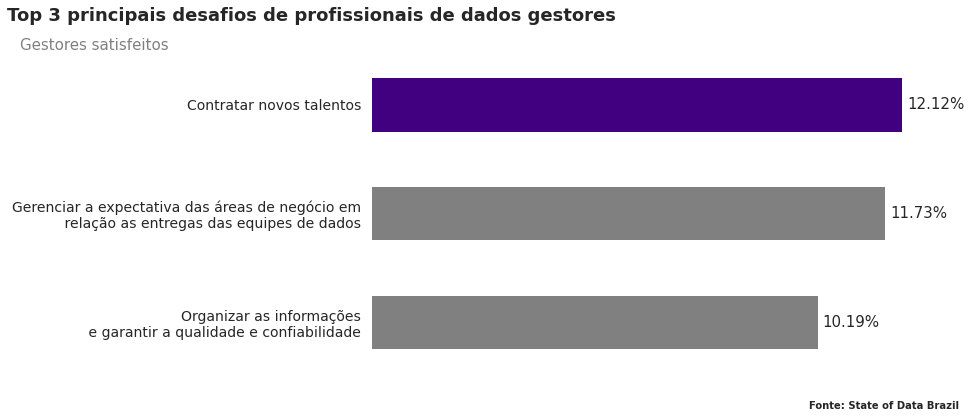

In [32]:
#Tabela de frequência 
satisfeitas_desafios = frequencia_desafios(satisfeitas).to_frame('percentual')
satisfeitas_top3_desafios = satisfeitas_desafios.copy()
satisfeitas_top3_desafios.index = satisfeitas_desafios.index.map(dicionario_desafios)
satisfeitas_top3_desafios = satisfeitas_top3_desafios[:3]

#Gráfico
satisfeitas_desafios_ordenado = satisfeitas_top3_desafios.sort_values(by='percentual',ascending=True).squeeze()

g = satisfeitas_desafios_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*2+['#400080'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Top 3 principais desafios de profissionais de dados gestores',
             x=-0.38,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-8,2.5,
         'Gestores satisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(10,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

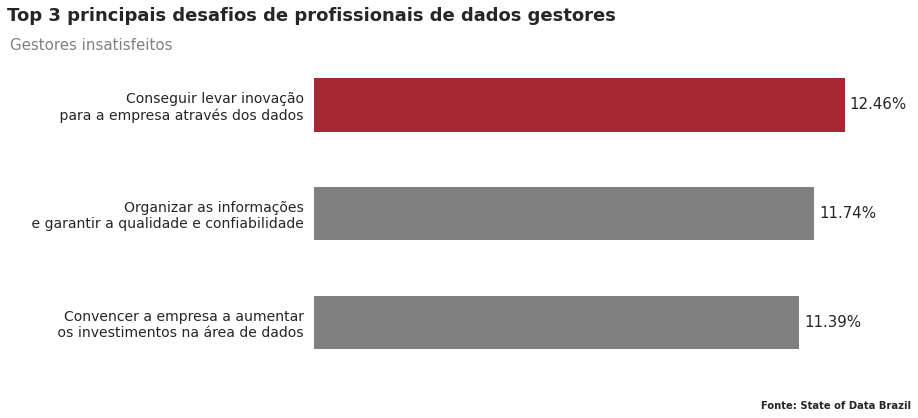

In [33]:
#Tabela de frequência
insatisfeitas_desafios = frequencia_desafios(insatisfeitas).to_frame('percentual')
insatisfeitas_top3_desafios = insatisfeitas_desafios.copy()
insatisfeitas_top3_desafios.index = insatisfeitas_desafios.index.map(dicionario_desafios)
insatisfeitas_top3_desafios = insatisfeitas_top3_desafios[:3]

#Desafios
insatisfeitas_desafios_ordenado = insatisfeitas_top3_desafios.sort_values(by='percentual',ascending=True).squeeze()

g = insatisfeitas_desafios_ordenado.plot(kind='barh',
                                           figsize=(10,6),
                                           xticks=([]),
                                           legend=False,
                                           color=['grey']*2+['#A82734'])
#Adicionando rótulo de dados
for rotulo in g.containers:                                                     
    g.bar_label(rotulo,fontsize=15,padding=5,fmt='%g%%')

#Configurando o tamanho dos valores do eixo y
g.tick_params(axis='y', labelsize=14)

#Adicionando título e subtítulo
plt.suptitle('Top 3 principais desafios de profissionais de dados gestores',
             x=-0.3,
             ha='left',
             size=18,
             fontweight='bold')
plt.text(-7.1,2.5,
         'Gestores insatisfeitos',                                                
         fontsize = 15,
         color='grey') 
plt.text(10.5,-0.8,
         'Fonte: State of Data Brazil',
         fontweight ='bold',                                                    
         fontsize = 10)    
plt.show()

Dentre os top 3 desafios dos gestores insatisfeitos, se destacam ações de "auto-afirmação" da área dentro da empresa.
Conseguir levar valor para os negócios e argumentar para que seja investido na área demonstram que os líderes da empresa ainda não acreditam ou entendem o valor da área de dados.

De fato, não há como realizar análises de valor sem que a área de dados esteja imersa nos negócios da empresa.

Outro ponto notável é o desafio similar entre os dois grupos (satisfeitos e insatisfeitos):
"Organizar as informações e garantir a qualidade e confiabilidade". 

É um ponto que chamou atenção, devido a minha visão como bibliotecário (cientista da informação). 

Dados precisam de contexto, entendimento, linhagem e análises mais aprofundadas e próximas da realidade do negócio para geraram valor.



<a id="section-five"></a>
## Considerações finais

A "falta de maturidade analítica da empresa" é o principal motivo da insatisfação de profissionais de dados no Brasil. 

É um problema de início e fim, pois ao mesmo tempo que gera a insatisfação, também acaba sendo o motivo dos profissionais não permanecerem na empresa atrasando o próprio amadurecimento dela. 

A retenção de profissionais gestores é um dos caminhos a se seguir para que possa amadurecer a estratégia e objetivos a médio e longo prazo e motivar e inspirar os demais profissionais a permanecerem na empresa trabalhando na sua estruturação.

**Mas como reter profissionais gestores em dados no Brasil?**

Durante essa análise, pude observar que os principais motivos de insatisfação são:
* A falta de maturidade analítica da empresa.
* A falta de oportunidade de crescimento.
* O desejo de trabalhar em outra área.

Aproximadamente 36% (5 dos 14) dos gestores em dados que o único motivo de insatisfação era de querer trabalhar em outra área, não tiveram experiência em TI ou em dados antes do trabalho atual.
Com o mercado de dados aquecido, pode ser que haja a necessidade de levar profissionais gestores com outras experiências para liderar projetos. Entretanto, devido as particularidades da área talvez não seja o cenário ideal, pois o profissional não conseguirá gerar mais valor para a companhia, criando assim uma frustração e o desejo de mudar de área. 

Os outros dois motivos, acabam liderando as posições a partir das diferentes perspectivas expostas nesta análise.

E até mesmo a falta de oportunidade de crescimento é um problema atrelado a falta de maturidade analítica da empresa.

**Como então reverter esse cenário?**

A partir dos dados desta análise, das minhas experiências pessoais/profissionais e dos pontos abordados na [Live da Bain & Company Brasil: "Como Atrair e reter Talento de dados no Brasil"](https://www.linkedin.com/video/live/urn:li:ugcPost:6930628284485353473/), trago 3 tópicos que poderão auxiliar nesse problema:

1. **Proximidade com o negócio:**

Para que a área de dados consiga elevar o nível de entrega do trabalho, ela precisa estar mais próxima dos negócios, resolvendo problemas reais do contexto.

Não necessariamente precisamos de ferramentas ou técnicas complexas, às vezes uma análise específica mas contextualizada, gera mais valor.

Não que precisamos ficar apenas com o Excel, aliás:

"(...) estamos em 2022. O Excel morreu." 

*Gabriel Lages, Live da Bain & Company Brasil*

É um desafio grande aumentar o contexto dos dados, principalmente devido a organização das informações e garantia da qualidade e confiabilidade (um dos principais desafios dos gestores). 

A estrutura do "Big Data" não consegue solucionar esse problema podendo gerar inconsistências. Com isso vem surgindo um novo paradigma, o "Data Mesh", que vem para transformar essa estrutura atual e promover uma melhor qualidade e proximidade do contexto das áreas de negócio.


2. **Cultura de inovação:**

Inovar não é fácil, mas inovar não é sempre ter que "reinventar a roda".

Uma das principais formas de se inovar é olhar para o "porquê" de um problema e ir coletando informações, transformando processos e **tentando.**

Tentar e errar faz parte da inovação (o ideal é que se erre rápido) e as empresas precisam entender que é desta forma que a área de dados conseguirá levar mais inovação para dentro da companhia.


3. **Capacitação:**

A oportunidade de aprendizado é um dos principais motivos que os profissionais almejam para entrar em outra empresa quando tiramos a remuneração/salário das opções.

A capacitação de profissionais da área de tecnologia é fundamental para que haja maior satisfação, melhoria da qualidade de entrega e atualização da própria empresa.

**"Educação é investimento."**

Empresas como a [Alura para empresas](https://www.alura.com.br/empresas) possuem soluções que auxiliam as empresas a investirem na capacitação.

Como até mesmo para o empresas do setor público, como o Banco do Brasil, que pelo meu conhecimento sobre, foje do padrão visto nos dados desta análise.


A capacitação de profissionais sobre dados, não deve ser apenas para os profissionais da área. A capacitação deve ser para todas as áreas, com o objetivo de democratizar os dados, assim como é uma [prática na Hotmart](https://medium.com/data-hackers/como-a-hotmart-democratizou-dados-em-2020-a8ccaeed5f2).

Deve-se promover o "data literacy" (letramento de dados) para as pessoas do negócio se tornarem mais autônomas e requisitarem profissionais de dados em situações mais complexas. Desta forma pode-se até mesmo aumentar o valor das análises de forma mais rápida, pois os profissionais já estão dentro deste contexto.





